# Exploratory Data Analysis

### Task

We would like to explore a dataset and prepare it for predictive modelling.

### Dataset Columns Explained
- **Crime_rate:** per capita crime rate by town
- **Mountain_view:** 'Yes' if property has mountain views; 'No' otherwise
- **Avg_room_num:** average number of rooms per dwelling
- **Low_stat:** % of lower income individuals in area
- **Value:** Median value of homes in $1000's

## Simple EDA framework:
 - Understand the data - dataset structure, check for missing values, basic statistics
 - Clean and preprocess - handle missing values, encode categorical variables, feature scaling
 - Explore relationships - analyse relationships between features and target variable, scatterplots, heatmaps, identify clusters
 - Assess feature importance - significance of features using statistical tests, Random Forests to evaluate feature importance
 - Iterate and refine - consider additional visualisations and techniques, refine data cleaning and preprocessing


## Questions we would like to answer:

1. What is the most important factor in determining the median value of homes in the metropolitan city dataset?
2. Are certain demographic factors, such as the percentage of lower-income individuals, correlated with lower median home values?
3. Was there a prioritisation of specific features, such as crime rate or average room number, in determining median home values?
4. Are there any unexpected patterns or trends in the housing dataset that were not initially anticipated?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Mounting notebook for Google Colab users
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_dataset.csv')
df.head()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
0,0.00632,No,6.575,4.98,24.0
1,0.02731,No,6.421,9.14,21.6
2,0.02729,No,7.185,4.03,34.7
3,0.03237,No,6.998,2.94,33.4
4,0.06905,No,7.147,5.33,36.2


### Understand the data

In this section, we will understand the contents of our dataset by checking the dataset's dimensions, summary statisitcs of variables, checking for inconsistencies such as missing values, and variable distribution.

In [4]:
# Dimensions
df.shape

(506, 5)

In [5]:
# Check for missing values
df.isnull().sum()

,0
Crime_rate,0
Mountain_view,0
Avg_room_num,0
Low_stat,0
Value,0


In [6]:
# Summary statistics
df.describe()

,Crime_rate,Avg_room_num,Low_stat,Value
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063,22.532806
std,8.601545,0.702617,7.141062,9.197104
min,0.006320,3.561000,1.730000,5.000000
25%,0.082045,5.885500,6.950000,17.025000
50%,0.256510,6.208500,11.360000,21.200000
75%,3.677083,6.623500,16.955000,25.000000
max,88.976200,8.780000,37.970000,50.000000


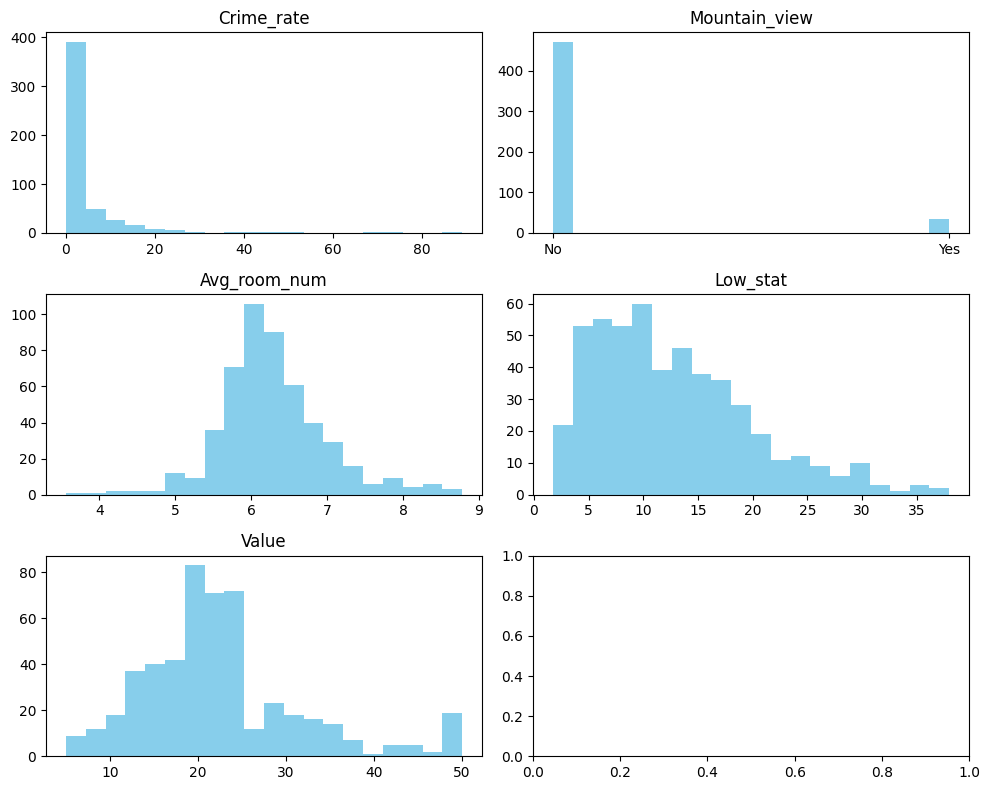

In [7]:
# Variable distribution

columns = df.columns.tolist()

fig, axs = plt.subplots(3, 2, figsize = (10,8))
axs = axs.flatten() # for easy iteration

# Plot histograms in subplots
for i, column in enumerate(columns):
  axs[i].hist(df[column], bins = 20, color = 'skyblue')
  axs[i].set_title(column)

plt.tight_layout()

### Clean and Preprocess

Our dataset does not have missing values, so we do not have to worry about that step. We do, however, have a categorical variable,'Mountain_view'. Because we are preparing this dataset for use in a machine learning model, we need to covert this variable to a numerical one using **variable encoding**.

In [8]:
# Unique entries for mountain view categorical variable
df['Mountain_view'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
# Encoding categorical variable
df['Mountain_view'] = df['Mountain_view'].map({'No': 0, 'Yes': 1})
df.head()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
0,0.00632,0,6.575,4.98,24.0
1,0.02731,0,6.421,9.14,21.6
2,0.02729,0,7.185,4.03,34.7
3,0.03237,0,6.998,2.94,33.4
4,0.06905,0,7.147,5.33,36.2


Another important consideration is that our numerical variables are measured on different scales, which can lead to issues when fitting a model. For example, variables with larger scales may disproportionately influence the model’s performance, even if they aren't necessarily more impactful than variables on smaller scales. To address this, we'll apply **feature scaling** to standardise the numerical variables, bringing them all to the same scale.

In [11]:
# Feature scaling
features = df.drop(columns = ['Mountain_view', 'Value'])

# Initialise StandardScaler
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns = features.columns)

scaled_df['Mountain_view'] = df['Mountain_view']
scaled_df['Value'] = df['Value']
scaled_df.head()

,Crime_rate,Avg_room_num,Low_stat,Mountain_view,Value
0,-0.419782,0.413672,-1.075562,0,24.0
1,-0.417339,0.194274,-0.492439,0,21.6
2,-0.417342,1.282714,-1.208727,0,34.7
3,-0.416750,1.016303,-1.361517,0,33.4
4,-0.412482,1.228577,-1.026501,0,36.2


**Important note:** When performing feature scaling, we typically only scale the input features and leave the target variable unchanged. The target variable (median house value in this case) is what we will try to predict when fitting a model, so it shouldn't be transformed by scaling, as this could affect the accuracy of the model's predictions.

### Explore Relationships

To explore the relationships between multiple features in our dataset, we'll begin with a pairplot. This visualisation will help us observe how each pair of variables interacts and identify potential patterns or correlations.

<Figure size 800x600 with 0 Axes>

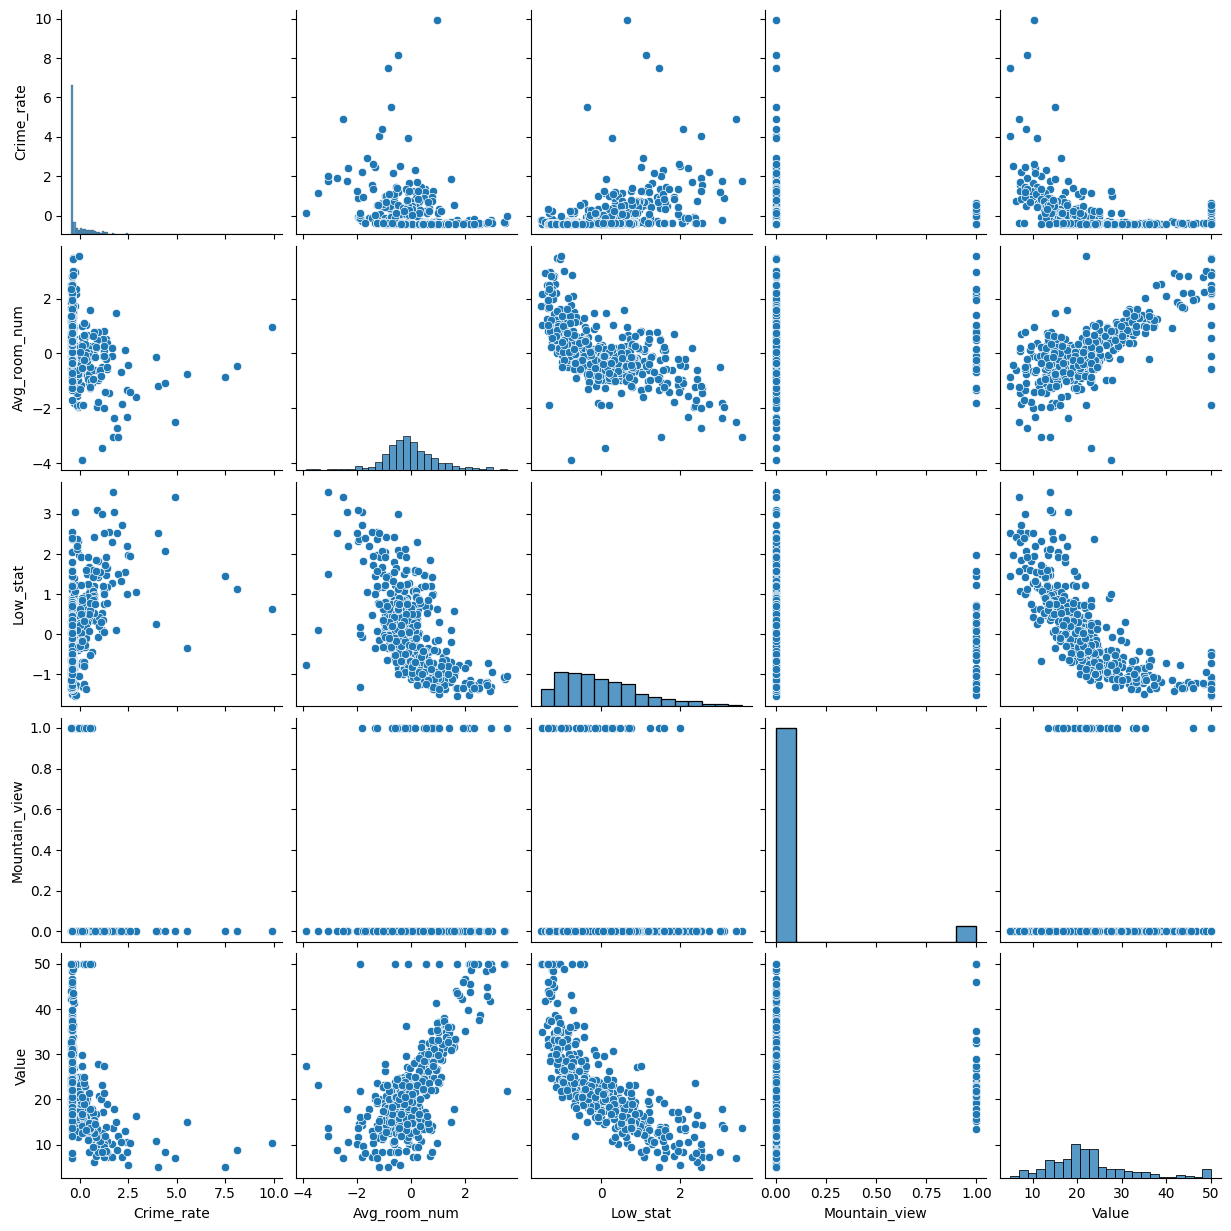

In [20]:
# Pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(scaled_df)

Building upon the insights gained from the pairplot, we'll now generate a heatmap to visualise the correlation matrix of the features. This will allow us to identify the strength of the linear relationships between each pair of variables more clearly.

Text(0.5, 1.0, 'Heatmap')

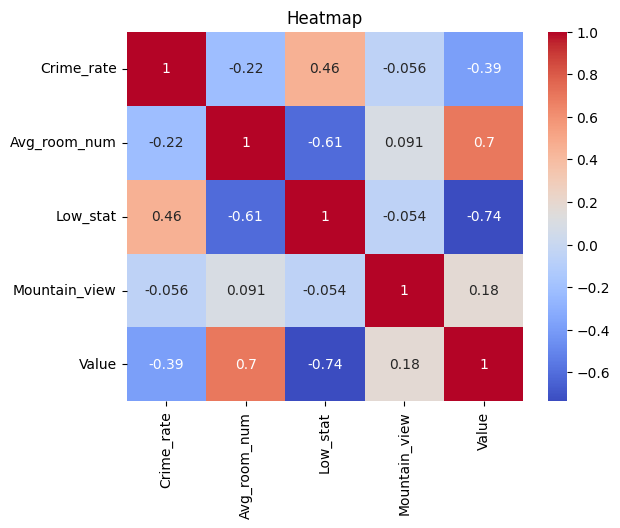

In [13]:
sns.heatmap(scaled_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap')

Next, we'll train a Random Forest Regressor to evaluate the importance of each feature in predicting the target variable, house value.

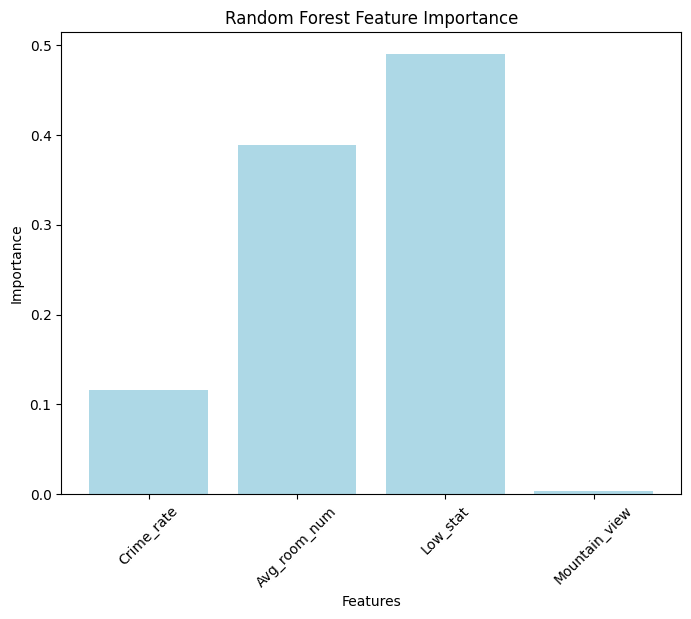

In [19]:
from sklearn.ensemble import RandomForestRegressor

X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)
importances = rf_regressor.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances, color='lightblue')
plt.xticks(range(len(importances)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()